In [ ]:
!pip install imblearn

In [5]:
import numpy                 as np
import pandas                as pd
import seaborn               as sns
import matplotlib.pyplot     as plt

from IPython.core.display    import HTML
from IPython.display         import Image

from scipy                   import stats    as ss
from sklearn                 import metrics  as m

from sklearn.impute          import SimpleImputer
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.compose         import ColumnTransformer, make_column_transformer, make_column_selector
from imblearn.over_sampling  import SMOTE
from imblearn.pipeline       import Pipeline


from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier
from sklearn.svm             import SVC


from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.metrics         import accuracy_score, roc_curve, confusion_matrix, classification_report



In [6]:
directory = './datasets/olist/'

orders              = pd.read_csv(directory + 'olist_orders_dataset.csv')
order_items         = pd.read_csv(directory + 'olist_order_items_dataset.csv')
order_payments      = pd.read_csv(directory + 'olist_order_payments_dataset.csv')
order_reviews       = pd.read_csv(directory + 'olist_order_reviews_dataset.csv')
customer            = pd.read_csv(directory + 'olist_customers_dataset.csv')
products            = pd.read_csv(directory + 'olist_products_dataset.csv')
product_translation = pd.read_csv(directory + 'product_category_name_translation.csv')
sellers             = pd.read_csv(directory + 'olist_sellers_dataset.csv')

In [7]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [8]:
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


## merge based on order_id for customers: m = merge
merge all the csv files for customers and then for sellers

In [9]:
m1 = pd.merge(orders, order_reviews, on='order_id')
m1.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [10]:
m2 = pd.merge(m1, order_payments, on = "order_id")

### since m2 and customer dataset, have a commom customer id column, we can merge them together

In [11]:
customer_data = pd.merge(m2, customer, on = "customer_id")
customer_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103672,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,...,2017-03-22 00:00:00,2017-03-23 11:02:08,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103673,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,...,2018-03-01 00:00:00,2018-03-02 17:50:01,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103674,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,...,2017-09-22 00:00:00,2017-09-22 23:10:57,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103675,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [12]:
# same for sellers now  
m1 = pd.merge(order_items, products, on='product_id')
m2 = pd.merge(m1, sellers, on='seller_id')
seller_data = pd.merge(m2, product_translation, on='product_category_name')


In [13]:
seller_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,artes_e_artesanato,53.0,923.0,5.0,1000.0,25.0,25.0,25.0,17201,jau,SP,arts_and_craftmanship
111019,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,artes_e_artesanato,32.0,660.0,3.0,500.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship
111020,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,artes_e_artesanato,57.0,942.0,5.0,500.0,21.0,7.0,14.0,17201,jau,SP,arts_and_craftmanship
111021,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,artes_e_artesanato,29.0,654.0,3.0,200.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship


In [14]:
## final merge based on seller and customer order id
df = pd.merge(customer_data, seller_data, on ='order_id')

In [15]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,...,828.0,4.0,4950.0,40.0,10.0,40.0,17602,tupa,SP,baby
115605,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,...,500.0,2.0,13300.0,32.0,90.0,22.0,8290,sao paulo,SP,home_appliances_2
115606,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,...,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories
115607,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,...,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories


In [16]:
# filtering useful columns
main_data = df[['order_id', 'order_item_id', 'order_status', 'payment_value', 'price', 'freight_value', 'customer_state', 'seller_state', 'order_purchase_timestamp', 'order_approved_at',
              'order_delivered_customer_date', 'order_estimated_delivery_date','payment_sequential','payment_type','payment_installments',
              'product_category_name_english', 'product_name_lenght','product_description_lenght', 'product_photos_qty','product_weight_g', 'review_score']].copy()

In [17]:
main_data.head(5)

,order_id,order_item_id,order_status,payment_value,price,freight_value,customer_state,seller_state,order_purchase_timestamp,order_approved_at,...,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,1,delivered,18.12,29.99,8.72,SP,SP,2017-10-02 10:56:33,2017-10-02 11:07:15,...,2017-10-18 00:00:00,1,credit_card,1,housewares,40.0,268.0,4.0,500.0,4
1,e481f51cbdc54678b7cc49136f2d6af7,1,delivered,2.00,29.99,8.72,SP,SP,2017-10-02 10:56:33,2017-10-02 11:07:15,...,2017-10-18 00:00:00,3,voucher,1,housewares,40.0,268.0,4.0,500.0,4
2,e481f51cbdc54678b7cc49136f2d6af7,1,delivered,18.59,29.99,8.72,SP,SP,2017-10-02 10:56:33,2017-10-02 11:07:15,...,2017-10-18 00:00:00,2,voucher,1,housewares,40.0,268.0,4.0,500.0,4
3,53cdb2fc8bc7dce0b6741e2150273451,1,delivered,141.46,118.70,22.76,BA,SP,2018-07-24 20:41:37,2018-07-26 03:24:27,...,2018-08-13 00:00:00,1,boleto,1,perfumery,29.0,178.0,1.0,400.0,4
4,47770eb9100c2d0c44946d9cf07ec65d,1,delivered,179.12,159.90,19.22,GO,SP,2018-08-08 08:38:49,2018-08-08 08:55:23,...,2018-09-04 00:00:00,1,credit_card,3,auto,46.0,232.0,1.0,420.0,5


In [18]:
main_data = main_data.rename(columns = {'product_category_name_english': 'product_name'})

In [19]:
print(main_data.shape[0], 'rows')
print(main_data.shape[1], 'columns')

115609 rows
21 columns


In [20]:
## check the dtypes
main_data.dtypes

order_id                          object
order_item_id                      int64
order_status                      object
payment_value                    float64
price                            float64
freight_value                    float64
customer_state                    object
seller_state                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
product_name                      object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
review_score                       int64
dtype: object

In [21]:
## check dtypes in a different way and convert into dataframe
datatypes = []
for i in main_data.columns:
    datatypes.append([i, 
                      main_data[i].dtypes, 
                      main_data[i].nunique(), 
                      main_data[i].drop_duplicates().sample(3).values])

pd.DataFrame(data=datatypes, columns=['attributes','dtypes', 'nunique','sample'])

,attributes,dtypes,nunique,sample
0,order_id,object,96516,"[41ed8506413669db4dc723ccad490421, 7416b68f6ac..."
1,order_item_id,int64,21,"[13, 16, 8]"
2,order_status,object,7,"[invoiced, processing, shipped]"
3,payment_value,float64,28657,"[104.52, 100.7, 192.61]"
4,price,float64,5879,"[134.57, 94.45, 53.49]"
5,freight_value,float64,6954,"[103.38, 61.49, 81.56]"
6,customer_state,object,27,"[CE, SE, MG]"
7,seller_state,object,23,"[PE, MA, BA]"
8,order_purchase_timestamp,object,95989,"[2018-01-15 01:26:08, 2018-08-06 22:21:16, 201..."
9,order_approved_at,object,88332,"[2018-04-01 20:47:33, 2017-07-19 03:45:17, 201..."


In [22]:
## check NA in a different way and convert into dataframe

description = []
for i in main_data.columns:
    description.append([i, 
                        main_data[i].isna().sum(),
                        round((main_data[i].isna().sum()/len(main_data))*100)
                       ])

pd.DataFrame(data=description, columns=['attributes','null','%null'])

,attributes,null,%null
0,order_id,0,0
1,order_item_id,0,0
2,order_status,0,0
3,payment_value,0,0
4,price,0,0
5,freight_value,0,0
6,customer_state,0,0
7,seller_state,0,0
8,order_purchase_timestamp,0,0
9,order_approved_at,14,0


In [23]:
## REMOVE NA
main_data.dropna(how='any', inplace=True)

print(main_data.shape[0], 'rows')
print(main_data.shape[1], 'columns')

113194 rows
21 columns


In [24]:
cols = ['order_purchase_timestamp','order_approved_at','order_estimated_delivery_date', 'order_delivered_customer_date']

for i in cols:
    main_data[i] = pd.to_datetime(main_data[i]).dt.date
main_data[['order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date']].head()

,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date
0,2017-10-02,2017-10-02,2017-10-18,2017-10-10
1,2017-10-02,2017-10-02,2017-10-18,2017-10-10
2,2017-10-02,2017-10-02,2017-10-18,2017-10-10
3,2018-07-24,2018-07-26,2018-08-13,2018-08-07
4,2018-08-08,2018-08-08,2018-09-04,2018-08-17


In [25]:
num_attributes = main_data[['payment_sequential', 'payment_installments', 'payment_value', 'price', 'freight_value', 'product_name_lenght', 
                       'product_description_lenght', 'product_photos_qty', 'product_weight_g']]

cat_attributes = main_data[['order_status', 'order_id', 'order_item_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date','order_estimated_delivery_date', 
                       'payment_type', 'product_name', 'customer_state', 'seller_state', 'review_score']]

In [26]:
num_attributes.describe()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g
count,113194.000000,113194.000000,113194.000000,113194.000000,113194.000000,113194.000000,113194.000000,113194.000000,113194.000000
mean,1.090818,2.943663,171.558120,119.847173,20.002551,48.802940,784.728943,2.206831,2106.279308
std,0.686671,2.779175,264.196543,181.079187,15.711666,10.016106,650.329648,1.718323,3765.219179
min,1.000000,0.000000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000
25%,1.000000,1.000000,60.850000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000
50%,1.000000,2.000000,107.970000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000
75%,1.000000,4.000000,189.157500,132.980000,21.190000,57.000000,982.000000,3.000000,1800.000000
max,26.000000,24.000000,13664.080000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000


In [27]:
cat_attributes.astype('category').describe()

,order_status,order_id,order_item_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_type,product_name,customer_state,seller_state,review_score
count,113194,113194,113194,113194,113194,113194,113194,113194,113194,113194,113194,113194
unique,2,94472,21,611,608,642,444,4,71,27,22,5
top,delivered,895ab968e7bb0d5659d16cd74cd1650c,1,2017-11-24,2018-04-24,2018-05-21,2017-12-20,credit_card,bed_bath_table,SP,SP,5
freq,113187,63,99172,1379,1134,523,640,83535,11684,47813,80728,65146


In [28]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,113194.0,1.090818,0.686671,1.00,1.00,1.00,1.0000,26.00
payment_installments,113194.0,2.943663,2.779175,0.00,1.00,2.00,4.0000,24.00
payment_value,113194.0,171.558120,264.196543,0.00,60.85,107.97,189.1575,13664.08
price,113194.0,119.847173,181.079187,0.85,39.90,74.90,132.9800,6735.00
freight_value,113194.0,20.002551,15.711666,0.00,13.08,16.32,21.1900,409.68
product_name_lenght,113194.0,48.802940,10.016106,5.00,42.00,52.00,57.0000,76.00
product_description_lenght,113194.0,784.728943,650.329648,4.00,346.00,600.00,982.0000,3992.00
product_photos_qty,113194.0,2.206831,1.718323,1.00,1.00,1.00,3.0000,20.00
product_weight_g,113194.0,2106.279308,3765.219179,0.00,300.00,700.00,1800.0000,40425.00


In [29]:
cat_attributes.astype('category').describe().T

,count,unique,top,freq
order_status,113194,2,delivered,113187
order_id,113194,94472,895ab968e7bb0d5659d16cd74cd1650c,63
order_item_id,113194,21,1,99172
order_purchase_timestamp,113194,611,2017-11-24,1379
order_approved_at,113194,608,2018-04-24,1134
order_delivered_customer_date,113194,642,2018-05-21,523
order_estimated_delivery_date,113194,444,2017-12-20,640
payment_type,113194,4,credit_card,83535
product_name,113194,71,bed_bath_table,11684
customer_state,113194,27,SP,47813


In [30]:
df1 = main_data.copy()

## We need more information to relate the review score!!
Let us first make the hypothesis and then decide which factors are crucial here:

**1.** Customers installments tend to give a negative review score. These customers pay for a long time, so they probably expect more.      

**2.** More spending eqauls higher probability of negative review. If a customer spends more, that customer is likely to expect more.

**3.** If the delivery date exceeds, a negative score is guranteed in most cases.    

**4.** A positive score is guranteed when the product is delivered in short time (before the estimated or the actual deilvery date)

**5.** Negative review scores have the highest average freight value. In addition to customers not liking to pay for freight, more expensive freight can mean more days for delivery. 

## Feature Engineering

In [31]:
df2 = main_data.copy()
df2['estimated_delivery_days']  = df2['order_estimated_delivery_date'] - df2['order_purchase_timestamp']
df2['delivery_days']            = df2['order_delivered_customer_date'] - df2['order_purchase_timestamp']

cols = ['estimated_delivery_days', 'delivery_days']
for col in cols:
    df2[col] = df2[col].apply(lambda x: x.days)

# whether the product arrived on time(1) or not(0)

df2['arrival_on_time'] = df2['estimated_delivery_days'] - df2['delivery_days']
df2['arrival_on_time'] = df2['arrival_on_time'].apply(lambda x: 1 if x >= 1 else 0)

# order status binary transformation -- delivered(1), canceled(0)

df2['order_status'] = df2['order_status'].replace(['canceled','delivered'], [0,1])

# review score binary transformation -- positive review(1), negative review(0)

df2['review_score'] = df2['review_score'].apply(lambda x: 1 if x > 3 else 0)

# remove the timestamps from the dataset, order_id and order_items, since we have already extracted the information we would like 

df2.drop(['order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'order_id', 'order_item_id'], axis=1,inplace=True)

In [32]:
df2.shape

(113194, 18)

In [33]:
df_train, df_test = train_test_split(df2, test_size=0.2, random_state=42)

In [34]:
df_train

,order_status,payment_value,price,freight_value,customer_state,seller_state,payment_sequential,payment_type,payment_installments,product_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,review_score,estimated_delivery_days,delivery_days,arrival_on_time
71235,1,36.10,21.99,14.11,PR,SP,1,credit_card,1,health_beauty,31.0,1356.0,2.0,525.0,1,29,22,1
72903,1,52.57,44.99,7.58,SP,SP,1,credit_card,1,housewares,54.0,1754.0,1.0,250.0,1,16,3,1
62637,1,116.74,95.99,20.75,PR,SP,1,boleto,1,bed_bath_table,51.0,168.0,1.0,1500.0,1,22,12,1
81549,1,58.62,49.90,8.72,SP,SP,1,credit_card,5,cool_stuff,53.0,537.0,2.0,1800.0,1,14,4,1
93715,1,75.80,39.90,35.90,CE,SC,1,credit_card,4,housewares,55.0,252.0,8.0,750.0,1,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78496,1,52.84,38.99,13.85,SP,SP,1,credit_card,1,bed_bath_table,54.0,634.0,1.0,800.0,1,24,8,1
112631,1,56.89,41.79,15.10,SP,SC,1,voucher,1,sports_leisure,53.0,1330.0,4.0,575.0,1,25,6,1
105933,1,34.42,19.90,14.52,MG,SP,1,credit_card,3,furniture_decor,62.0,445.0,2.0,300.0,1,55,9,1
881,1,46.78,29.99,16.79,MT,SP,1,boleto,1,telephony,60.0,755.0,6.0,350.0,0,31,23,1


In [35]:
num_attributes = df_train[['payment_value', 'price','freight_value', 'product_name_lenght','product_description_lenght', 'product_weight_g',\
                           'estimated_delivery_days', 'delivery_days', 'payment_sequential','payment_installments','product_photos_qty']]

cat_attributes = df_train[['order_status', 'customer_state', 'seller_state', 'payment_type', 'product_name', 'arrival_on_time', 'review_score']]

In [36]:
cat_attributes.astype('category').count()

order_status       90555
customer_state     90555
seller_state       90555
payment_type       90555
product_name       90555
arrival_on_time    90555
review_score       90555
dtype: int64

In [37]:
num_attributes.count()

payment_value                 90555
price                         90555
freight_value                 90555
product_name_lenght           90555
product_description_lenght    90555
product_weight_g              90555
estimated_delivery_days       90555
delivery_days                 90555
payment_sequential            90555
payment_installments          90555
product_photos_qty            90555
dtype: int64

In [38]:
df_train['review_score'].unique()

array([1, 0])

### COUNTPLOT FOR REVIEW SCORE

<AxesSubplot: xlabel='review_score', ylabel='count'>

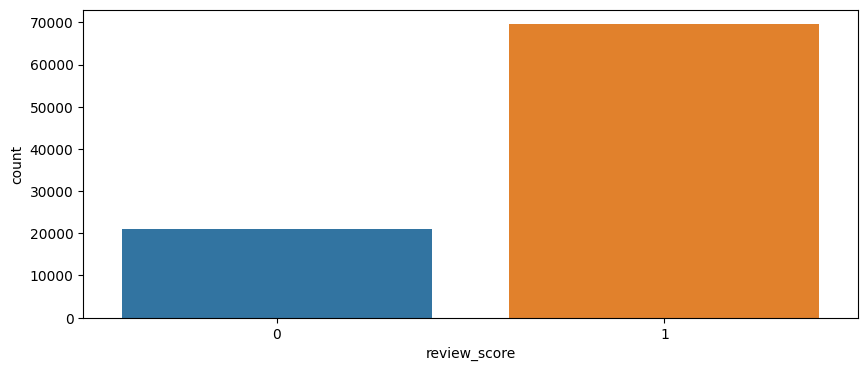

In [39]:
plt.figure(figsize= (10,4))
sns.countplot(x = df_train['review_score'])

## Numeric_attributes

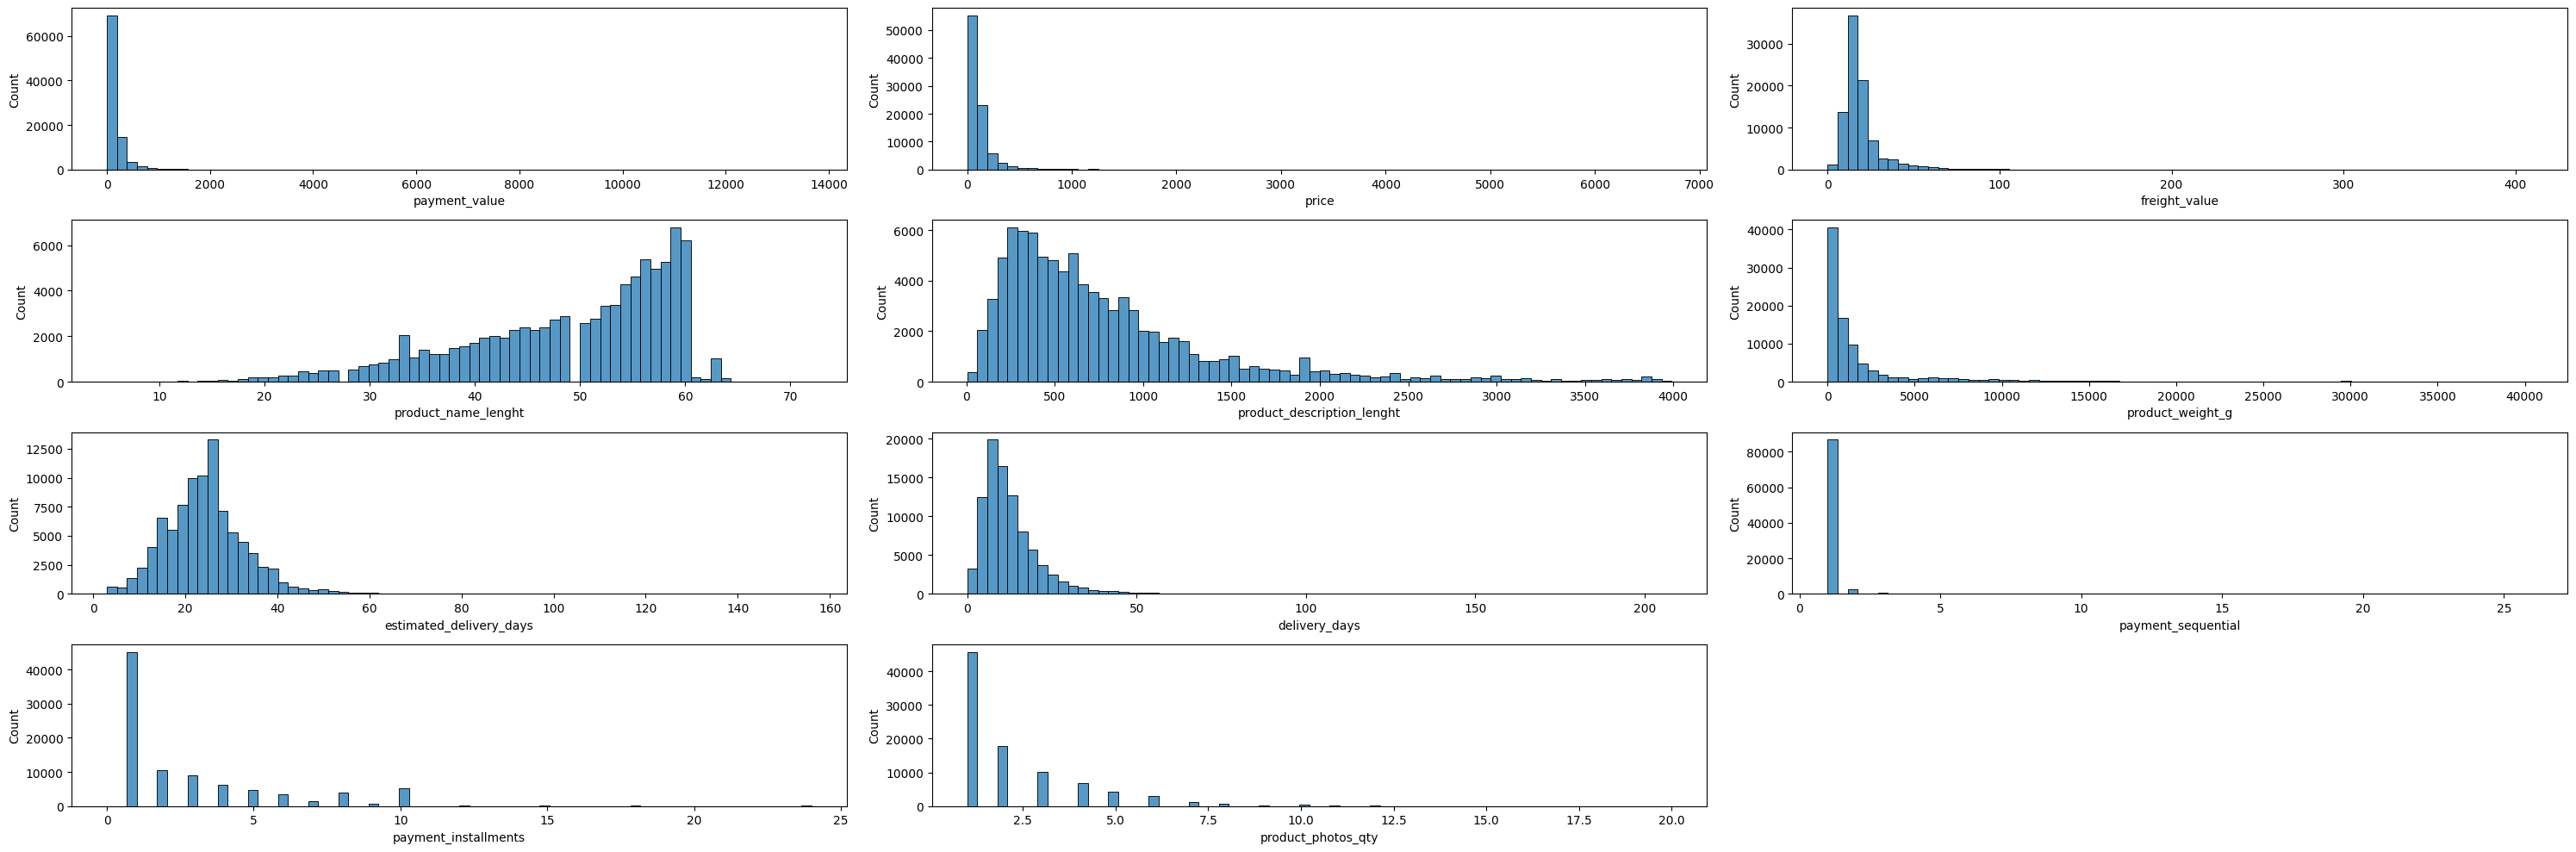

In [40]:
rows = 4
cols = 3
num_cols = num_attributes

fig = plt.figure(figsize=(30,10))
for i, col in enumerate(num_cols):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.histplot(x = num_attributes[col], bins = 70, ax = ax)

fig.tight_layout()
plt.show()

## Categorical Attributes

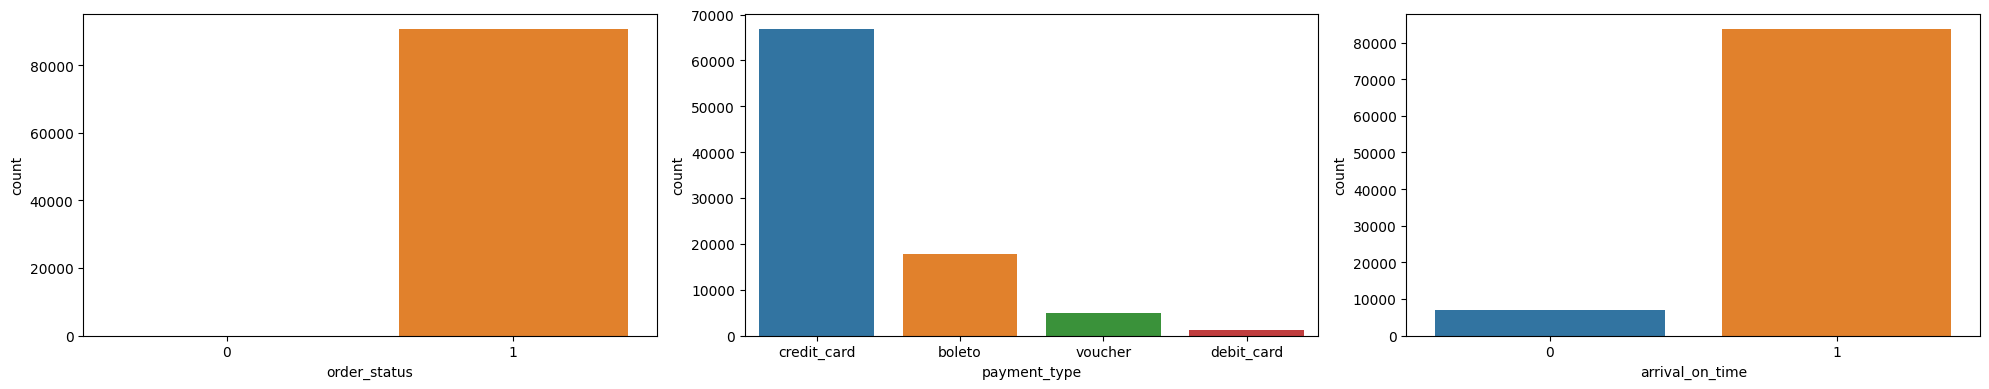

In [41]:
cols = 3
rows = 1 
num_cols = cat_attributes[['order_status', 'payment_type', 'arrival_on_time']]

fig = plt.figure(figsize= (20, 4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.countplot(x=cat_attributes[col], ax=ax)
    
fig.tight_layout()       
plt.show()

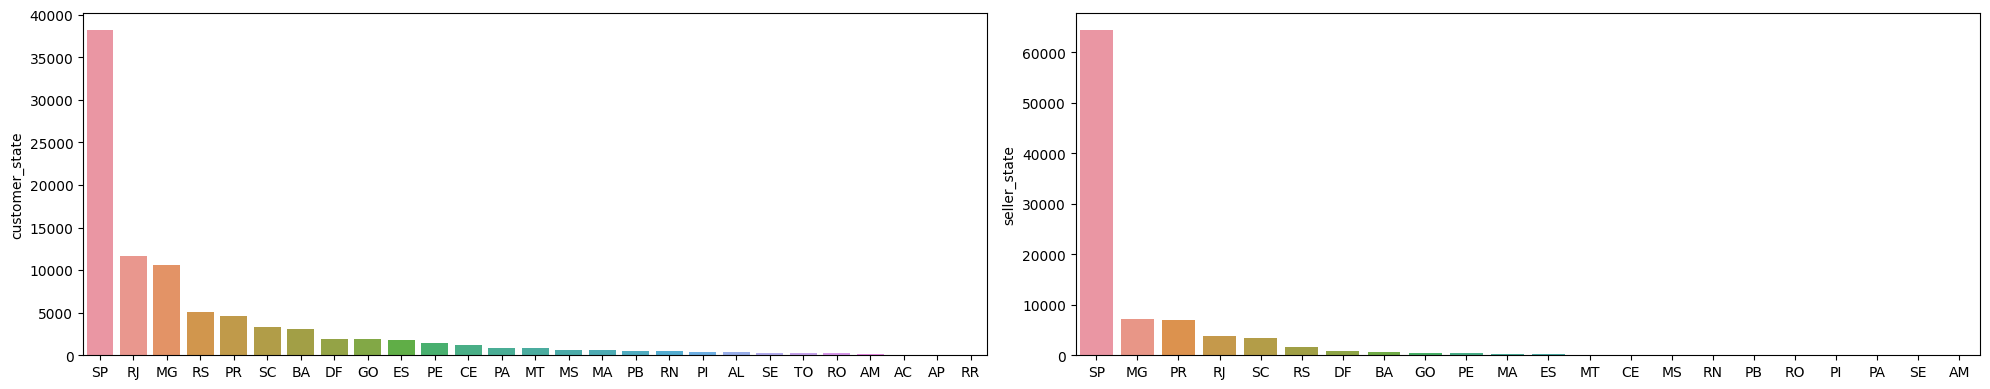

In [42]:
cols = 2
rows = 1 
num_cols = cat_attributes[['customer_state', 'seller_state']]

fig = plt.figure(figsize= (20, 4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.barplot(x=cat_attributes[col].value_counts().index,
                y=cat_attributes[col].value_counts(), ax=ax)
    
fig.tight_layout()       
plt.show() 

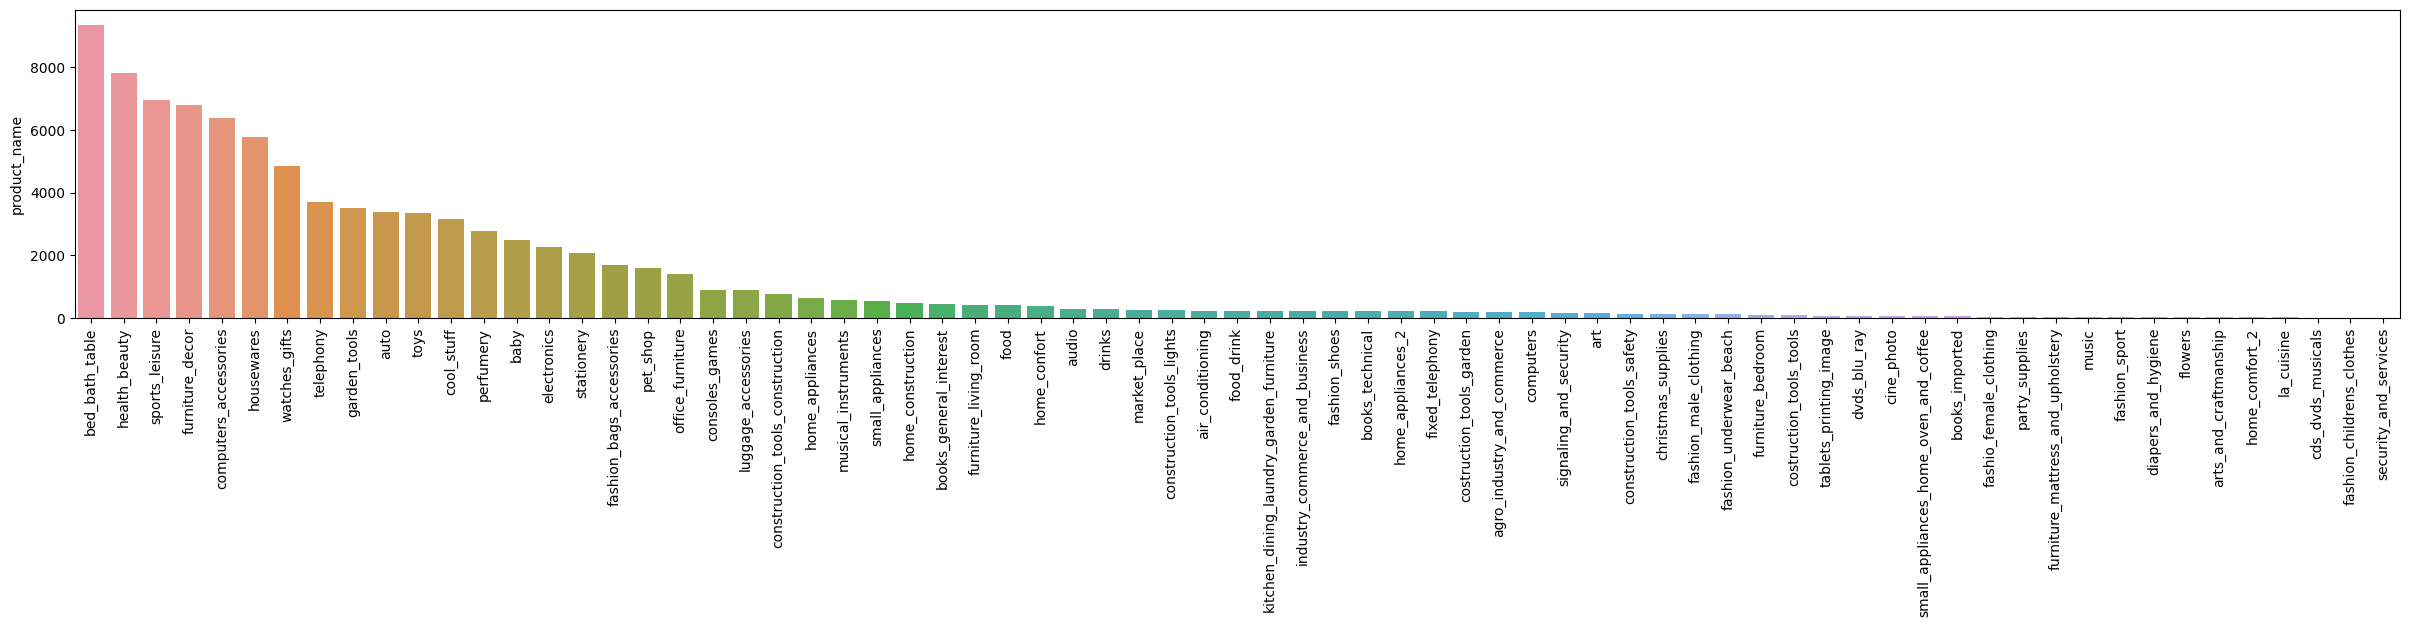

In [43]:
plt.figure(figsize = (30,4))
sns.barplot(x = cat_attributes['product_name'].value_counts().index,
           y = cat_attributes['product_name'].value_counts())
plt.xticks(rotation = 90)
plt.show()

### payment_type with payment_value

<AxesSubplot: xlabel='payment_type', ylabel='payment_value'>

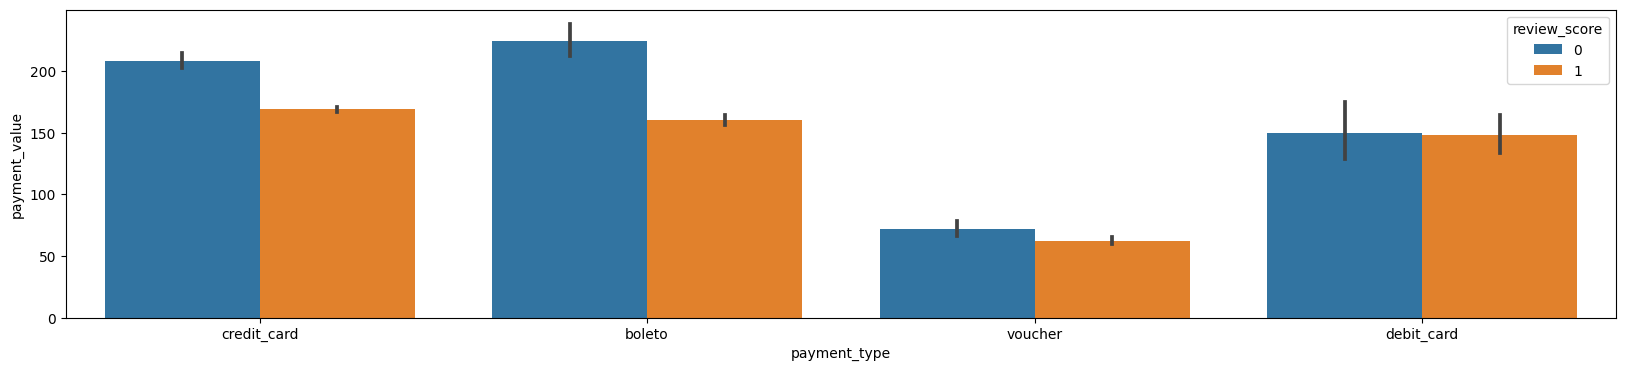

In [44]:
plt.figure(figsize = (20,4))
sns.barplot(x = df_train['payment_type'], y = df_train['payment_value'], hue = df_train['review_score'])

### payment installments vs review_score

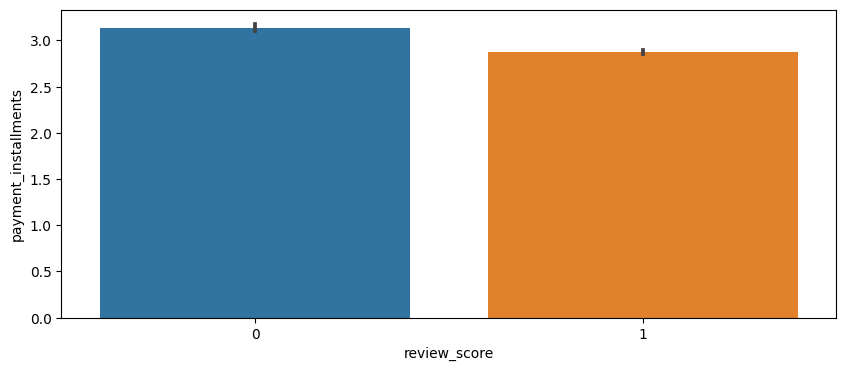

In [45]:
plt.figure(figsize=(10, 4))
sns.barplot(y='payment_installments', x='review_score', data=df_train);

In [46]:
aux = df_train[['review_score', 'payment_installments']].groupby('review_score').mean().reset_index()
print(aux)

negative_score = aux.iloc[0,1]
positive_score = aux.iloc[1,1]

percentage = abs(((negative_score - positive_score) / positive_score)*100)
percentage 
print(f'\n Negative review scores have {percentage:.2f}% more payment installments than positive review scores.')

   review_score  payment_installments
0             0              3.136879
1             1              2.876163

 Negative review scores have 9.06% more payment installments than positive review scores.


In [47]:
df_train['payment_value']

71235      36.10
72903      52.57
62637     116.74
81549      58.62
93715      75.80
           ...  
78496      52.84
112631     56.89
105933     34.42
881        46.78
16105     362.95
Name: payment_value, Length: 90555, dtype: float64

### Payment_value with review_score

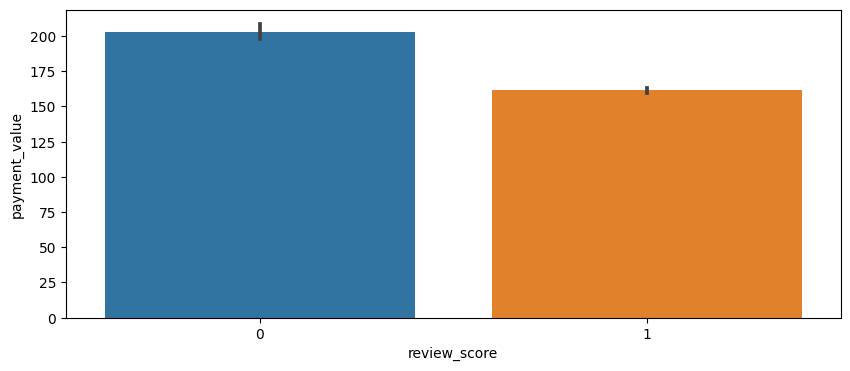

In [48]:
plt.figure(figsize=(10, 4))
sns.barplot(y='payment_value', x='review_score', data=df_train);

In [49]:
aux = df_train[['review_score', 'payment_value']].groupby('review_score').mean().reset_index()
print(aux)

negative_score = aux.iloc[0,1]
positive_score = aux.iloc[1,1]

percentage = abs(((negative_score - positive_score) / positive_score)*100)
percentage 
print(f'\n Negative review scores have {percentage:.2f}% more payment installments than positive review scores.')

   review_score  payment_value
0             0     202.978588
1             1     161.375174

 Negative review scores have 25.78% more payment installments than positive review scores.


In [50]:
### Review Score with Price

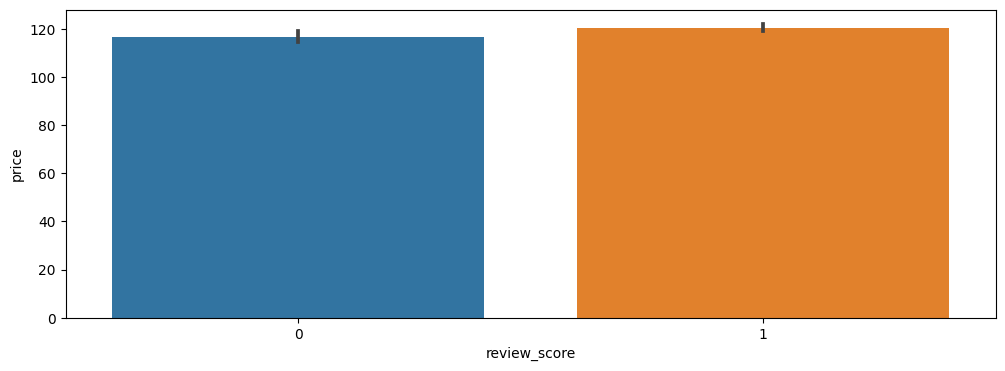

In [51]:
plt.figure(figsize=(12, 4))
sns.barplot(x = 'review_score', y = 'price', data=df_train);

In [52]:
aux = df_train[['review_score', 'price']].groupby('review_score').mean().reset_index()
print(aux)

negative_score = aux.iloc[0,1]
positive_score = aux.iloc[1,1]

percentage = abs(((negative_score - positive_score) / positive_score)*100)
percentage 
print(f'\n Positive review scores have {percentage:.2f}% more price than negative review scores.')

   review_score       price
0             0  116.894568
1             1  120.699787

 Positive review scores have 3.15% more price than negative review scores.


### Review Score vs arrival time

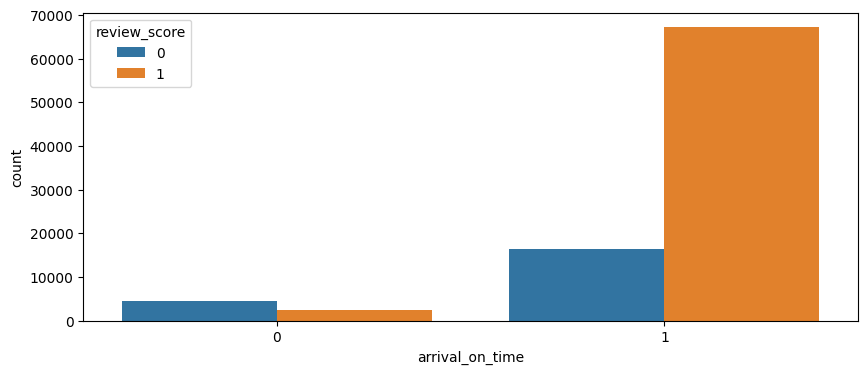

In [53]:
plt.figure(figsize=(10, 4))
sns.countplot(x = 'arrival_on_time', hue='review_score', data=df_train);

### corelation between review score with respect to estimated and actual delivery date

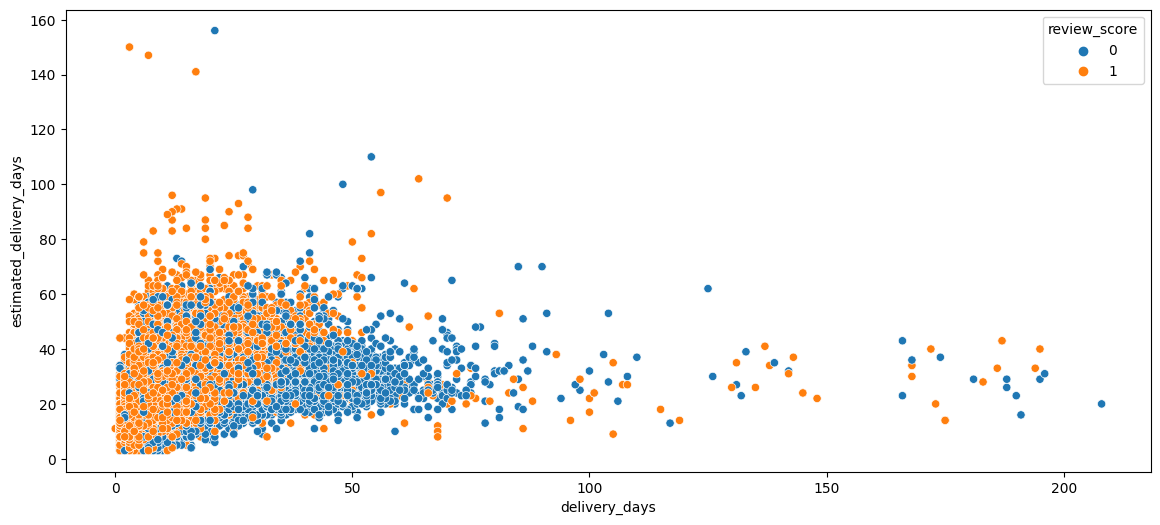

In [54]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='delivery_days', y='estimated_delivery_days', hue='review_score', data=df_train);

* Most positive reviews have long estimated delivery days, but the actual delivery days are before or on schedule. 
* Most negative review scores have short estimated delivery days, but the actual delivery days of the product are longer than the expected time.

### correlation between numeric attributes

/tmp/ipykernel_925863/2055582113.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr(method='pearson')


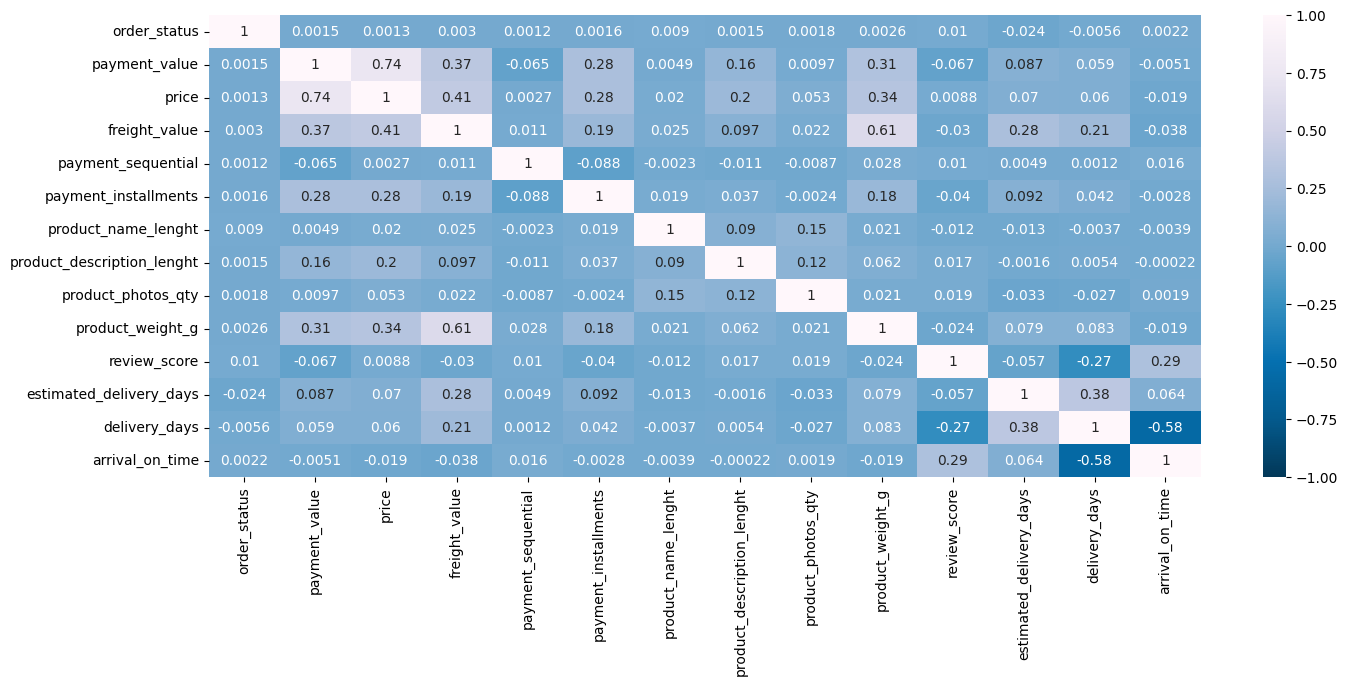

In [55]:
corr = df_train.corr(method='pearson')

plt.figure(figsize=(16, 6))
sns.heatmap(corr, cmap='PuBu_r', vmin=-1, vmax=1, annot=True);

In [56]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min( kcorr-1, rcorr-1 )))


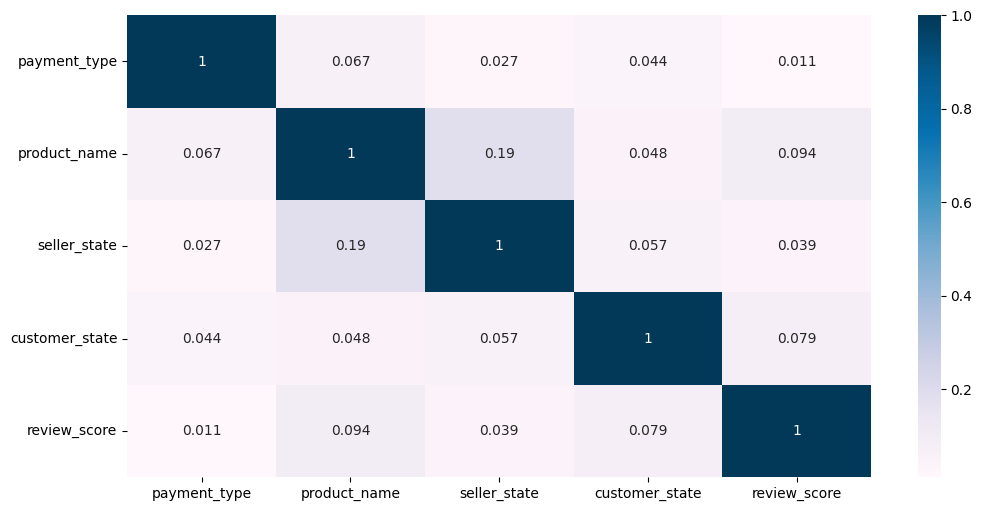

In [57]:
a = df_train[['payment_type', 'product_name','seller_state', 'customer_state', 'review_score']]

a1  = cramer_v(a['payment_type'], a['payment_type'    ])
a2  = cramer_v(a['payment_type'], a['product_name'])
a3  = cramer_v(a['payment_type'], a['seller_state'    ])
a4  = cramer_v(a['payment_type'], a['customer_state'  ])
a5  = cramer_v(a['payment_type'], a['review_score'    ])

a6  = cramer_v(a['product_name'], a['payment_type'    ])
a7  = cramer_v(a['product_name'], a['product_name'])
a8  = cramer_v(a['product_name'], a['seller_state'    ])
a9  = cramer_v(a['product_name'], a['customer_state'  ])
a10 = cramer_v(a['product_name'], a['review_score'    ])

a11 = cramer_v(a['seller_state'], a['payment_type'    ])
a12 = cramer_v(a['seller_state'], a['product_name'])
a13 = cramer_v(a['seller_state'], a['seller_state'    ])
a14 = cramer_v(a['seller_state'], a['customer_state'  ])
a15 = cramer_v(a['seller_state'], a['review_score'    ])

a16 = cramer_v(a['customer_state'], a['payment_type'    ])
a17 = cramer_v(a['customer_state'], a['product_name'])
a18 = cramer_v(a['customer_state'], a['seller_state'    ])
a19 = cramer_v(a['customer_state'], a['customer_state'  ])
a20 = cramer_v(a['customer_state'], a['review_score'    ])
               
a21 = cramer_v(a['review_score'], a['payment_type'    ])
a22 = cramer_v(a['review_score'], a['product_name'])
a23 = cramer_v(a['review_score'], a['seller_state'    ])
a24 = cramer_v(a['review_score'], a['customer_state'  ])
a25 = cramer_v(a['review_score'], a['review_score'    ])

d = pd.DataFrame({'payment_type':      [a1,  a2,  a3,  a4,  a5  ], 
                   'product_name': [a6,  a7,  a8,  a9,  a10 ],
                   'seller_state':     [a11, a12, a13, a14, a15 ],
                   'customer_state':   [a16, a17, a18, a19, a20 ],
                   'review_score':     [a21, a22, a23, a24, a25 ]})

d = d.set_index(d.columns)

plt.figure(figsize=(12, 6))
sns.heatmap(d, annot=True, cmap='PuBu');

In [58]:
num_features = [['order_status', 'payment_value', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 'product_name_lenght', 
                 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'estimated_delivery_days', 'delivery_days', 'arrival_on_time']]

num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                  ('scaler',  StandardScaler())])

In [59]:
cat_features = [['customer_state', 'seller_state', 'payment_type', 'product_category']]

cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                  ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [60]:
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', cat_transformer, cat_features)])

preprocessor = make_column_transformer((num_transformer, make_column_selector(dtype_include=np.number)), 
                                       (cat_transformer, make_column_selector(dtype_include=object)))

In [61]:
df_train = df_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

X_train  = df_train.drop("review_score", axis=1)
y_train  = df_train["review_score"].copy()

X_test = df_test.drop("review_score", axis=1)
y_test = df_test["review_score"].copy()

In [62]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='newton-cg'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(XGBClassifier())

In [63]:
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGB']

acuracy_list  = []
auc_list = []
n_precision_list = []
p_precision_list = []

n_recall_list = []
p_recall_list  = []

n_fscore_list = []
p_fscore_list = []

cm_list = []

for model in model_pipeline:
    
    # defining a global seed
    np.random.seed(7)
    
    # full pipeline
    preprocessor = preprocessor
    oversample   = SMOTE(random_state=14)
    model        = model
    
    steps = [('preprocessor', preprocessor), ('oversample', oversample), ('model', model)]

    pipeline = Pipeline(steps=steps)
    print("running")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print("calculating metrics")
    ## ml evaluation
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # acuracy
    acuracy_list.append(report['accuracy'])
    
    # precision
    n_precision_list.append(report['0']['precision'])
    p_precision_list.append(report['1']['precision'])
    
    #recall
    n_recall_list.append(report['0']['recall'])
    p_recall_list.append(report['1']['recall'])
    
    # f1-score
    n_fscore_list.append(report['0']['f1-score'])
    p_fscore_list.append(report['1']['f1-score'])

    # ROC, AUC and confusion Matrix
    fpr, tpr, _thresholds = roc_curve(y_test, y_pred)
    auc_list.append(round(m.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))

running


/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


calculating metrics
running


/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


calculating metrics
running


/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


calculating metrics
running


/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


calculating metrics
running


/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


calculating metrics
running


/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


calculating metrics


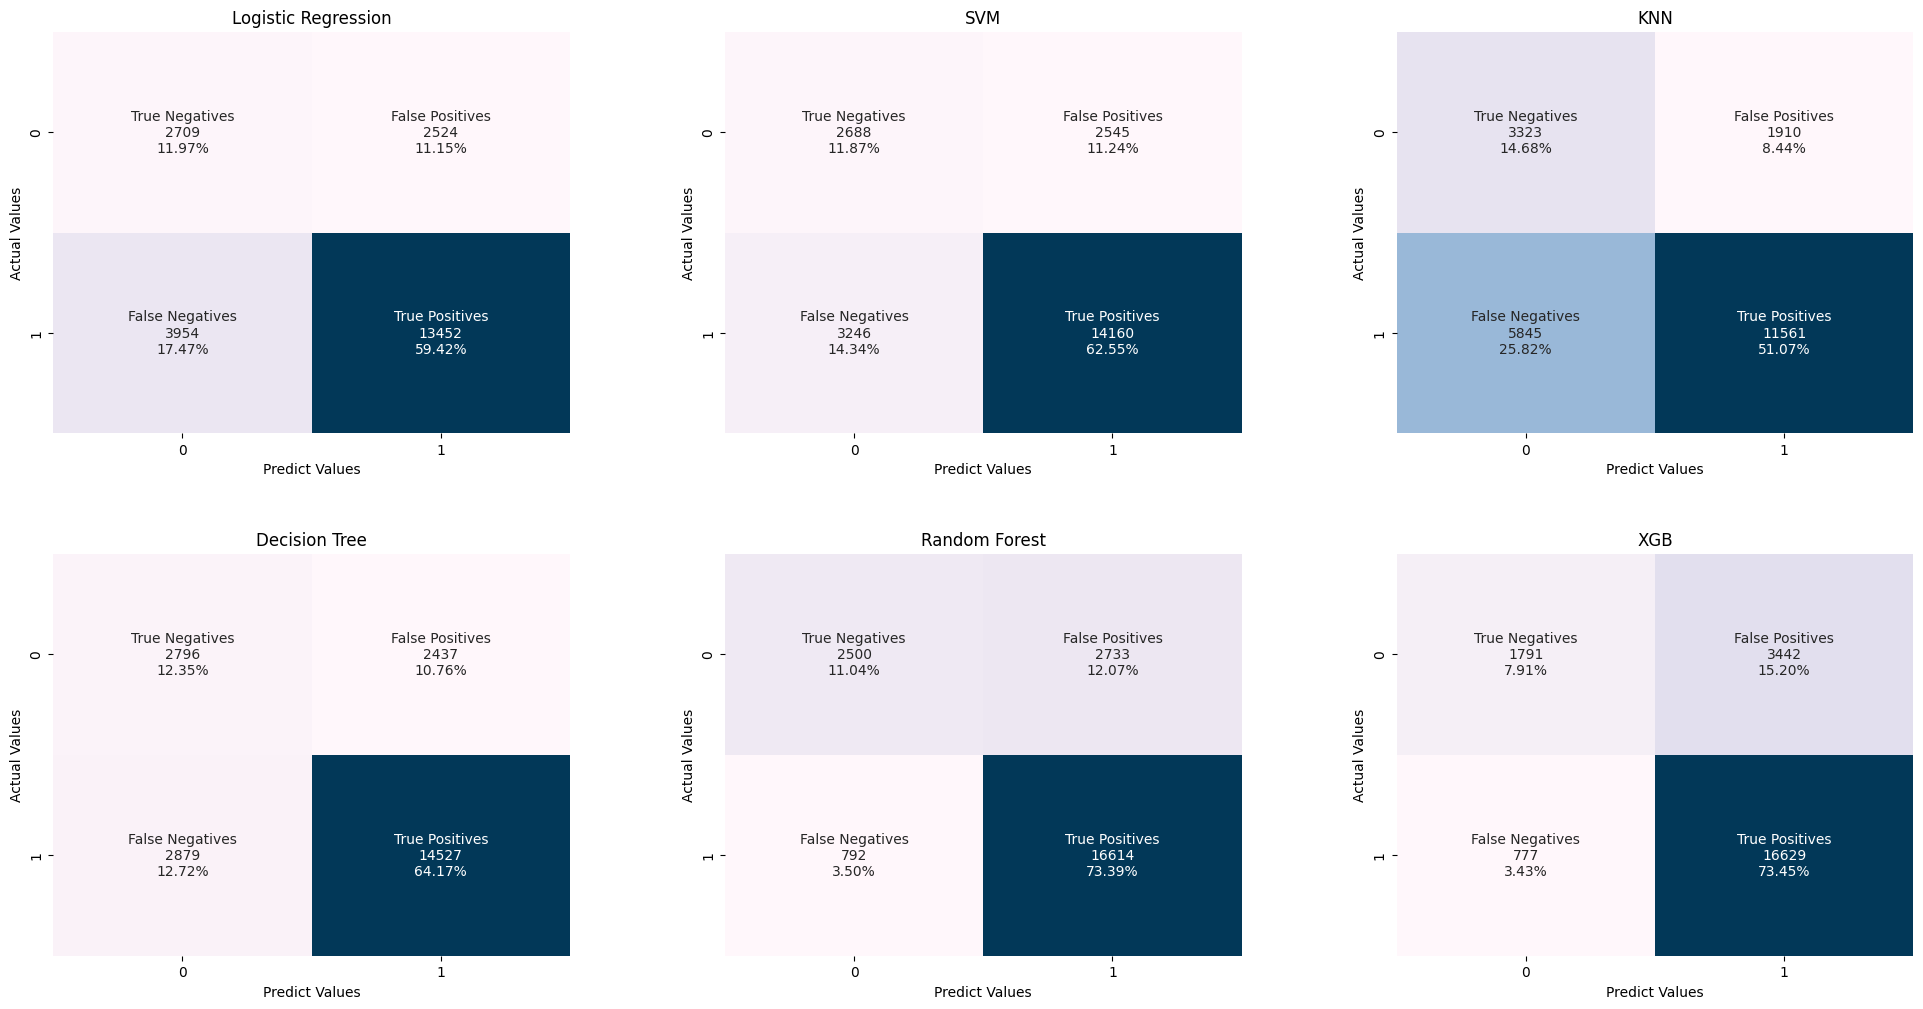

In [64]:
def cf_matrix_labels(cf_matrix):
    
    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    return labels

fig = plt.figure(figsize=(24, 12))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    
    sub = fig.add_subplot(2, 3, i+1)
    cm_plot = sns.heatmap(cm, annot=cf_matrix_labels(cm), fmt='', cmap='PuBu', cbar=False)
    cm_plot.set_title(model)
    cm_plot.set_xlabel('Predict Values')
    cm_plot.set_ylabel('Actual Values') 
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [70]:
df_results = pd.DataFrame({'Model' : model_list,
                           'Accuracy'     : acuracy_list, 
                           'AUC'          : auc_list,
                           'Precision (0)': n_precision_list, 
                           'Precision (1)': p_precision_list,
                           'Recall (0)'   : n_recall_list,     
                           'Recall (1)'   : p_recall_list, 
                           'F1-Score (0)' : n_fscore_list ,     
                           'F1-Score (1)' : p_fscore_list})

df_results.style.highlight_max(subset=['Accuracy', 'AUC', 'Precision (0)', 'Precision (1)', 'Recall (0)', 'Recall (1)', 
                                       'F1-Score (0)','F1-Score (1)'], color='lightblue', axis=0)

,Model,Accuracy,AUC,Precision (0),Precision (1),Recall (0),Recall (1),F1-Score (0),F1-Score (1)
0,Logistic Regression,0.713857,0.650000,0.406574,0.842013,0.517676,0.772837,0.455447,0.805943
1,SVM,0.744202,0.660000,0.452983,0.847650,0.513663,0.813513,0.481418,0.830231
2,KNN,0.657450,0.650000,0.362456,0.858214,0.635009,0.664196,0.461496,0.748842
3,Decision Tree,0.765184,0.680000,0.492687,0.856343,0.534302,0.834597,0.512651,0.845330
4,Random Forest,0.844295,0.720000,0.759417,0.858738,0.477737,0.954498,0.586510,0.904089
5,XGB,0.813640,0.650000,0.697430,0.828509,0.342251,0.955360,0.459172,0.887424


In [66]:
# defining a global seed
np.random.seed(7)
    
# ml pipeline
preprocessor = preprocessor
oversample   = SMOTE(random_state=14)
model        = KNeighborsClassifier()
  
steps = [('preprocessor', preprocessor), ('oversample', oversample), ('model', model)]
pipeline = Pipeline(steps=steps)

param_grid  = [{'model__n_neighbors': [3, 6, 12],
                 'model__weights'   : ['uniform', 'distance']}]

grid = GridSearchCV(pipeline, param_grid, cv=10, scoring='balanced_accuracy', verbose=0)
grid = grid.fit(X_train, y_train)

/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse

/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse

/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [67]:
print ('Score:', grid.best_score_)
print ('Parameters: ', grid.best_params_)

Score: 0.6730031267211423
Parameters:  {'model__n_neighbors': 6, 'model__weights': 'distance'}


In [68]:
np.random.seed(7)
    
# ml pipeline
preprocessor = preprocessor
oversample   = SMOTE(random_state=14)
model        = KNeighborsClassifier(n_neighbors=6, weights='distance')
  
steps = [('preprocessor', preprocessor), ('oversample', oversample), ('model', model)]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


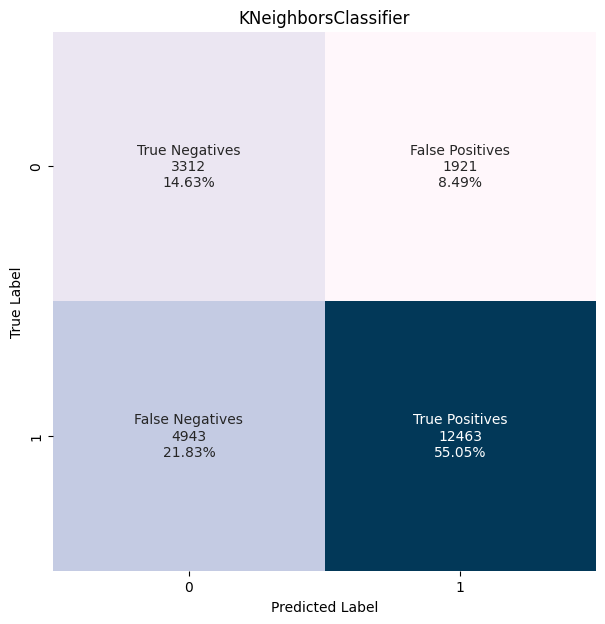

In [69]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=cf_matrix_labels(cm), fmt='', cmap='PuBu', ax=ax, cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('KNeighborsClassifier')

plt.subplots_adjust(hspace=0.3)